# Pearson Corelation for BTC,ETH,LTC,XRP Crypto Currencies

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_dataset(filename):
    print('Reading data from %s' % filename)
    df = pd.read_csv(filename)
    df.datetime = pd.to_datetime(df.datetime) # change to datetime
    df = df.set_index('datetime') 
    df = df.sort_index() # sort by datetime
    print(df.shape)
    return df

In [4]:
#Reading Datasets
df_btc = read_dataset('prices_2020/BTC_2020.csv')
df_eth = read_dataset('prices_2020/ETH_2020.csv')
df_ltc = read_dataset('prices_2020/LTC_2020.csv')
df_xrp = read_dataset('prices_2020/XRP_2020.csv')

Reading data from prices_2020/BTC_2020.csv
(366, 6)
Reading data from prices_2020/ETH_2020.csv
(366, 6)
Reading data from prices_2020/LTC_2020.csv
(366, 6)
Reading data from prices_2020/XRP_2020.csv
(366, 6)


In [5]:
df_btc.head()

,low,high,open,close,volumefrom,volumeto
datetime,,,,,,
2020-01-01,7150.00,7237.35,7168.36,7178.68,1119.11,8052270.93
2020-01-02,6900.00,7184.94,7178.68,6950.56,3972.71,27928978.29
2020-01-03,6853.53,7402.31,6950.56,7338.91,8072.73,58367332.83
2020-01-04,7256.03,7396.10,7338.91,7344.48,3256.74,23825437.64
2020-01-05,7310.00,7495.00,7344.48,7356.70,2707.27,20108463.48


In [6]:
df_eth.head()

,low,high,open,close,volumefrom,volumeto
datetime,,,,,,
2020-01-01,128.17,132.64,128.63,130.27,9263.16,1210406.89
2020-01-02,125.67,130.31,130.27,126.76,14036.97,1805954.87
2020-01-03,125.55,134.90,126.76,133.89,33830.22,4428329.72
2020-01-04,132.30,135.69,133.89,133.85,8324.23,1110753.55
2020-01-05,133.85,138.23,133.85,134.94,6286.34,856024.29


In [7]:
df_ltc.head()

,low,high,open,close,volumefrom,volumeto
datetime,,,,,,
2020-01-01,41.00,41.97,41.09,41.39,3202.84,132752.57
2020-01-02,38.97,41.61,41.39,39.28,13464.37,537963.59
2020-01-03,38.61,42.35,39.28,42.15,41355.50,1696013.31
2020-01-04,41.74,42.80,42.15,42.79,17694.60,748682.58
2020-01-05,42.58,44.50,42.79,43.25,6149.57,267121.67


In [8]:
df_xrp.head()

,low,high,open,close,volumefrom,volumeto
datetime,,,,,,
2020-01-01,0.1914,0.1947,0.1925,0.1925,6357233.56,1227933.30
2020-01-02,0.1847,0.1925,0.1925,0.1870,37935984.18,7175949.69
2020-01-03,0.1840,0.1939,0.1870,0.1931,54955918.24,10487422.93
2020-01-04,0.1902,0.1935,0.1931,0.1926,26697730.69,5132215.35
2020-01-05,0.1926,0.1974,0.1926,0.1945,24723525.55,4817268.86


In [9]:
df = pd.DataFrame({'BTC': df_btc.close,
                   'ETH': df_eth.close,
                   'LTC': df_ltc.close,
                   'XRP': df_xrp.close})

df.head()

,BTC,ETH,LTC,XRP
datetime,,,,
2020-01-01,7178.68,130.27,41.39,0.1925
2020-01-02,6950.56,126.76,39.28,0.1870
2020-01-03,7338.91,133.89,42.15,0.1931
2020-01-04,7344.48,133.85,42.79,0.1926
2020-01-05,7356.70,134.94,43.25,0.1945


In [11]:
df.describe()

,BTC,ETH,LTC,XRP
count,366.000000,366.000000,366.000000,366.000000
mean,11115.817240,307.452432,56.232377,0.258212
std,4311.622136,144.424088,18.233240,0.104924
min,4841.670000,109.420000,30.760000,0.140600
25%,8885.310000,199.680000,44.155000,0.198425
50%,9716.445000,245.130000,48.850000,0.236400
75%,11664.525000,388.342500,61.035000,0.270950
max,28992.790000,752.710000,130.150000,0.694200


The chart below shows the absolute closing prices. It is not of much use as BTC closing prices are much higher than prices of ETH and LTC and XRP.

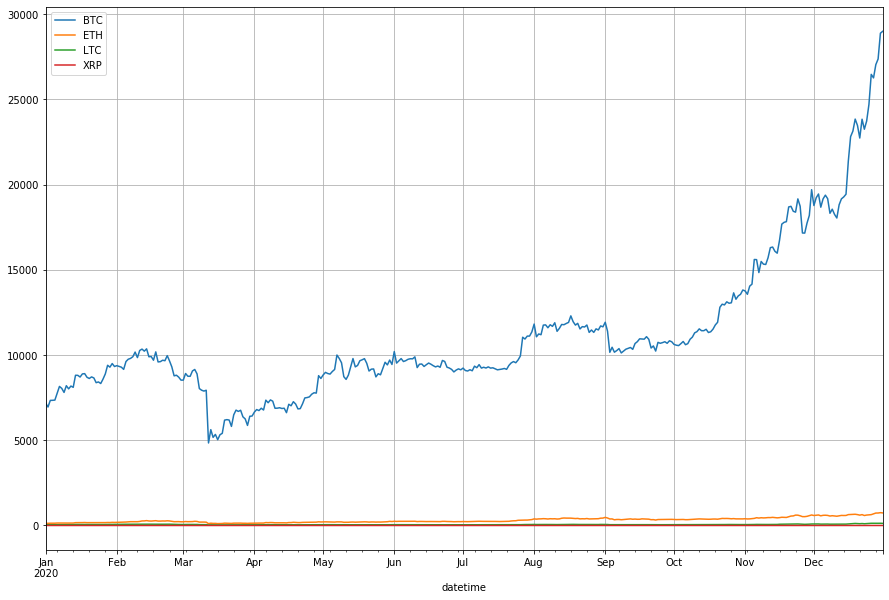

In [12]:
df.plot(grid=True, figsize=(15, 10))

# Measuring the correlation of closing prices 
We calculate the Pearson correlation between the closing prices of BTC, ETH, LTC, XRP. 
Pearson correlation is a measure of the linear correlation between two variables X and Y. It has a value between +1 and −1, where 1 is the total positive linear correlation, 0 is no linear correlation, and −1 is the total negative linear correlation. The correlation matrix is symmetric .

In [20]:
# Compute the correlation matrix
corr = df.corr()
corr

,BTC,ETH,LTC,XRP
BTC,1.000000,0.940941,0.866755,0.714173
ETH,0.940941,1.000000,0.758979,0.750728
LTC,0.866755,0.758979,1.000000,0.675679
XRP,0.714173,0.750728,0.675679,1.000000


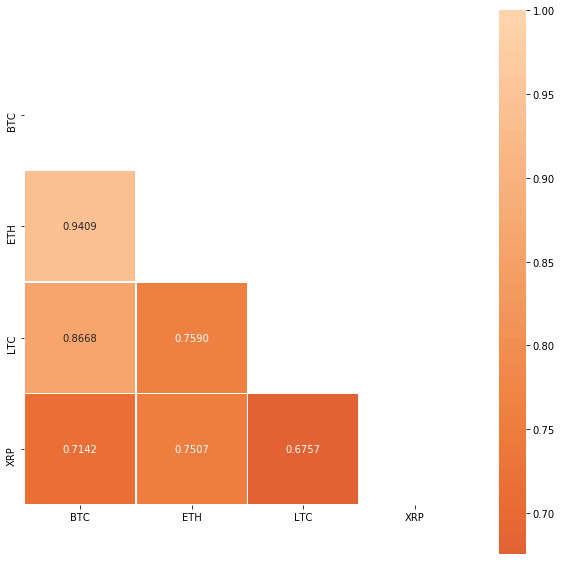

In [19]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

# Observations:
    BTC,XRP,LTC,ETH all 4 are higly corelated as the value is greater than 0.7
    BTC and ETH are even more corelated with 0.9409

# BY:
    Dhanavath Rajesh
    Prefinal year Dual Degree Student
    ECE
    IIT Kharagpur
    9933432222
    danavathrajesh123@gmail.com